## 문제정의

- 서울지역(국)의 경도 위도 정보를 이용하여 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류


## 데이터 수집

- 서울의 대표적인 구(district)의 위치 데이터

    - 컬럼 주석
        - district : 행정지역(송파구, ...)
        - dong : 구보다 작은 행정구역
        - longitude/latituede : 경도 위도
        - label : 한강기준으로 동서남북으로 구분한 지역명
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import pickle

with open('./Data/seoulmap/district_dict_list.pickle', 'rb') as f:
    train_df = pickle.load(f)
with open('./Data/seoulmap/dong_dict_list.pickle', 'rb') as f:
    test_df = pickle.load(f)

train_df.head()
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


In [2]:
# 현 데이터 레이블 갯수 확인
train_df.label.value_counts()

Gangbuk     5
Gangseo     5
Gangnam     5
Gangdong    5
Name: label, dtype: int64

In [3]:
test_df.label.value_counts()

Gangbuk     5
Gangseo     5
Gangnam     5
Gangdong    5
Name: label, dtype: int64

### 전처리

#### 실습
- 현재데이터로 강북, 강서, 강남, 강동이라는 4가지 분류값으로  
위도, 경도 정보만으로 지역의 레이블을 예측해 볼 수 잇도록 전처리

In [4]:
# 경도위도 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [5]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


## 데이터 시각화

Text(0.5, 1, 'district visualization in 2d plane')

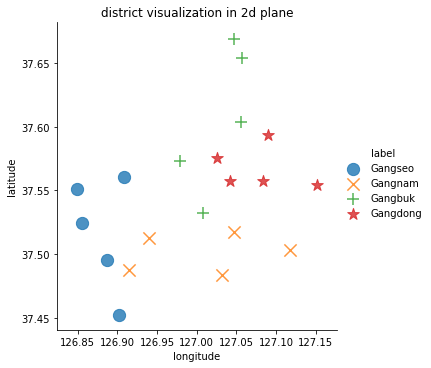

In [6]:
# 위도, 경도에 따른 데이터 시각화
# 회귀선 : fit_reg
# 점크기 : scatter_kws
sns.lmplot('longitude', 'latitude', data=train_df, 
           fit_reg=False,
          scatter_kws={"s":150}, 
          markers = ["o", "x", "+", '*'],
          hue='label')
plt.title('district visualization in 2d plane')
# 강서 : o 
# 강북 : +
# 강남 : x
# 강동 : *

### 데이터 다듬기
- 학습에 필요없는 특징데이터 제거
    - 학습데이터에서는 구이름 컬럼 제거
        - 테스트데이터에서는 동이름 컬럼 제거
        

In [7]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

X_train = train_df[ ['longitude', 'latitude'] ]
y_train = train_df[ ['label'] ]

X_test = test_df[ ['longitude', 'latitude'] ]
y_test = test_df[ ['label'] ]

### 결정표면 시각화 함수

In [8]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [9]:
def display_decision_surface( clf, X, y ):
    # 차트의 범위와 모든 학습데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01

    # 파라미터 설정
    n_classes = len( le.classes_ )
    plot_colors = 'rywb'
    plot_step = 0.001
    
    # plt.contourf 등고선 차트를 그리기 위해 x, y 이차원 영역설정
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step) )
    Z = clf.predict( np.c_[xx.ravel(), yy.ravel()] )
    Z = Z.reshape( xx.shape )
    cs = plt.contourf( xx, yy, Z, cmap=plt.cm.RdYlBu )
    
    #학습데이터를 차트에 표시
    for i, color in zip( range(n_classes), plot_colors ):
        idx = np.where(y==i)
        plt.scatter( X.loc[idx].longitude,
                     X.loc[idx].latitude,
                     c=color,
                     label = le.classes_[i],
                     cmap = plt.cm.RdYlBu, edgecolor='black', s=200 )
    # 차트 제목
    plt.title("Decision surface of a decision tree", fontsize=16)
    # 차트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, 
               borderaxespad=0., fontsize=14)
    plt.xlabel( 'longitude', fontsize = 16 )
    plt.ylabel( 'latitude', fontsize  = 16 )
    # 차트 크기 설정
    plt.rcParams[ 'figure.figsize' ]  = [7, 5]
    # 차트 폰트 크기 설정
    plt.rcParams[ 'font.size' ]       = 14
    # x축, y축 좌표상의 폰트 크기 설정
    plt.rcParams[ 'xtick.labelsize' ] = 14
    plt.rcParams[ 'ytick.labelsize' ] = 14
    
    plt.show()

In [10]:
help(le.classes_)

NameError: name 'le' is not defined

### 파라미터없이 학습한 모델의 결정표면 시각화

- 의사결정트리는 오버피팅 되기 상당히 쉬운 모델

    - 별도의 파라미터를 설정하지 않을 경우 최대한 학습데이터에만  
    잘 맞게 모델이 형성(오버피팅)

        - 시각화 결과를 보면 강남, 강북, 강동, 강서 지역 부분이라기 보다는  
        단순한 학습데이터 구분에만 집중된 모델임을 볼 수 있다


In [11]:
le        = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf       = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


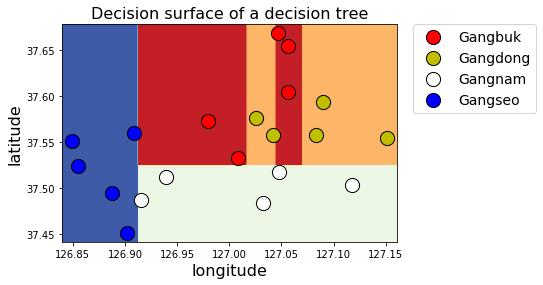

In [12]:
display_decision_surface(clf, X_train, y_encoded)

### 파라미터 설정한 모델의 결정표면 시각화
- max_depth : 트리의 최대한도 깊이
    - min_samples_split : 자식노드를 갖기위한 최소한의 데이터갯수
        - min_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 갯수
        - random_state : 
        - 오버피팅을 피하기 위해 파라미터를 설정한 의사결정트리의  
        의사 결정 표면 차트
        - 오버피팅된 이전 모델보다 강동, 강서, 강남, 강북을 더 적절하게 분류한것을 확인 할 수 있다
                    

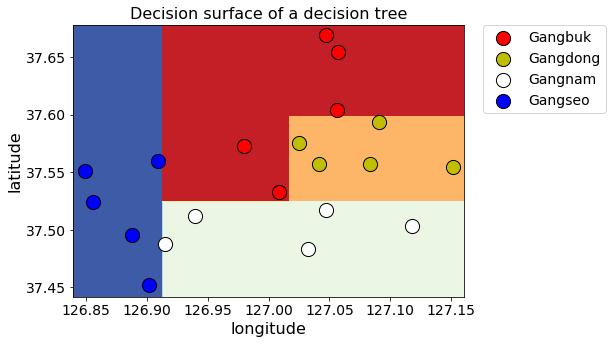

In [13]:
clf = tree.DecisionTreeClassifier( max_depth = 4,
                                 min_samples_split=2,
                                 min_samples_leaf=2,
                                 random_state=70 ).fit( X_train, y_encoded.ravel() )
display_decision_surface(clf, X_train, y_encoded)

### 의사결정트리 시각화
- `conda install -c anaconda graphviz`
- `pip install graphviz'
    1. `https://graphviz.gitlab.io/_pages/Download/Download_windows.html` 에서 msi
    1. 내컴퓨터 우클릭@고급시스템설정 - 환경변수 PATH에 새로만들기
        - `C:\Program Files (x86)\Graphviz2.38\bin`

In [14]:
import graphviz

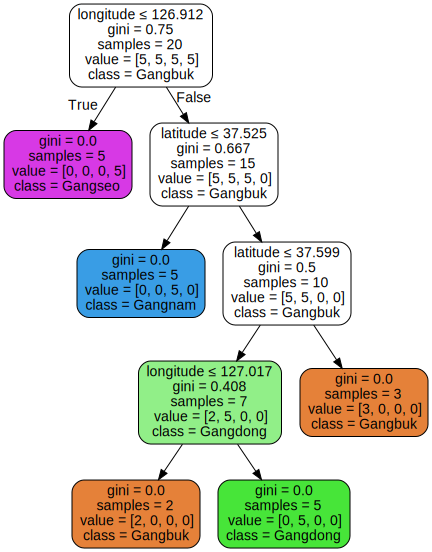

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['longitude', 'latitude'],
                               class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

- gini : 불순도 척도
    - 0일경우 모든 샘플이 하나의 분류값을 갖는다
    - 0이 아닐경우 1에 가까울수록 여러 분류값이 한노드에 존재
- samples : 노드안에 들어있는 데이터의 갯수
- value : 분류값 별 데이터의 갯수
- class : 분류값

### 테스트


In [16]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
pred

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
help(le.classes_)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [87]:
le.classes_[pred]

array(['Gangseo', 'Gangseo', 'Gangseo', 'Gangseo', 'Gangseo', 'Gangnam',
       'Gangnam', 'Gangnam', 'Gangnam', 'Gangnam', 'Gangbuk', 'Gangbuk',
       'Gangbuk', 'Gangbuk', 'Gangbuk', 'Gangdong', 'Gangdong',
       'Gangdong', 'Gangdong', 'Gangdong'], dtype=object)

In [81]:
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), le.classes_[pred]) ))

accuracy : 1.0


In [70]:
comparison = pd.DataFrame({'prediction': le.classes_[pred],
                          'ground_truth': y_test.values.ravel()})
comparison.head()

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
